<a href="https://colab.research.google.com/github/max1nehour/Boosting-ML-in-AMR-Prediction/blob/main/FS_XGB(e_faecium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#/content/drive/MyDrive/wulab_final

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',10)

# 函式

In [ ]:
def print_feature(model):
  features= []
  plt.figure(figsize=(10,6))
  plt.rcParams["figure.figsize"] = (10,20)
  plot_importance(model,max_num_features=100)
  for i in model.feature_importances_:
    if i > 0:
      features.append(i)
  print('特徵重要程度數量: ',len(features))

# 建立測試集的 DataFrme
def toDF (model,X_test,y_test):
  df_test=pd.DataFrame(X_test)
  df_test['Resistant'] = y_test
  pred = model.predict(X_test)
  df_test['Predict'] = pred
  #print(df_test)
  return pred


def keytrans(key,x):
  newkey = (int(i[1:]) for i in key)
  #print("newkey", newkey)
  f_names= []
  for i in newkey:
    f_names.append(x[i])
    #print("f_names", f_names)

  return f_names


## 1) 載入資料集

---------------ampicillin-----------------
           Gene       Chi2    P-value  Adjusted P-value  Significant
187   Gene_1058  62.613879  2.5147...  1.7376...              True  
272   Gene_1084  62.613879  2.5147...  1.7376...              True  
328   Gene_1...  62.613879  2.5147...  1.7376...              True  
346   Gene_1...  62.613879  2.5147...  1.7376...              True  
485   Gene_1...  62.613879  2.5147...  1.7376...              True  
...         ...        ...        ...        ...               ...  
6726  Gene_9368  62.613879  2.5147...  1.7376...              True  
6763  Gene_9521  62.613879  2.5147...  1.7376...              True  
6833   Gene_972  62.613879  2.5147...  1.7376...              True  
6848  Gene_9758  62.613879  2.5147...  1.7376...              True  
6852  Gene_9770  62.613879  2.5147...  1.7376...              True  

[196 rows x 5 columns]
train: 134
   Resistant  Susceptible
0        134          2  
   Resistant  Susceptible
0         33    

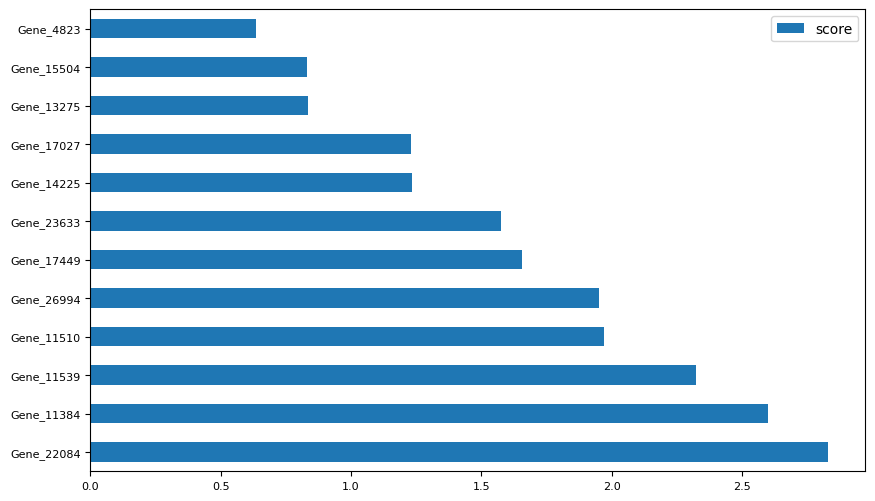

Thresh=0.144, n=1, Accuracy: 97.06%
Thresh=0.132, n=2, Accuracy: 97.06%
Thresh=0.118, n=3, Accuracy: 97.06%
Thresh=0.100, n=4, Accuracy: 97.06%
Thresh=0.099, n=5, Accuracy: 97.06%
Thresh=0.084, n=6, Accuracy: 97.06%
Thresh=0.080, n=7, Accuracy: 97.06%
Thresh=0.063, n=8, Accuracy: 97.06%
Thresh=0.062, n=9, Accuracy: 97.06%
Thresh=0.042, n=10, Accuracy: 97.06%
Thresh=0.042, n=11, Accuracy: 97.06%
Thresh=0.032, n=12, Accuracy: 97.06%
--------------------REPORT: ampicillin---------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        33

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------vancomycin-----------------
            Gene       Chi2    P-value  Adjusted P-value  Significant
12     Gene_1...  22.643502  1.9501...  4.1968...              True  
65     Gene_1...  26.713110  2.3601...  5.0790...              True  
111    Gene_1...  22.643502  1.9501...  4.1968...              True  
112    Gene_1...  38.247898  6.2304...  1.3407...              True  
201    Gene_1...  58.077828  2.5195...  5.4219...              True  
...          ...        ...        ...        ...               ...  
21248  Gene_9699  53.073157  3.2135...  6.9155...              True  
21250  Gene_9700  50.078641  1.4770...  3.1786...              True  
21271   Gene_972  48.390572  3.4924...  7.5157...              True  
21327  Gene_9784  25.819552  3.7487...  8.0672...              True  
21394  Gene_9858  55.215888  1.0799...  2.3239...              True  

[495 rows x 5 columns]
train: 150
   Resistant  Susceptible
0        150         86  
   Resistant  Susceptible
0   

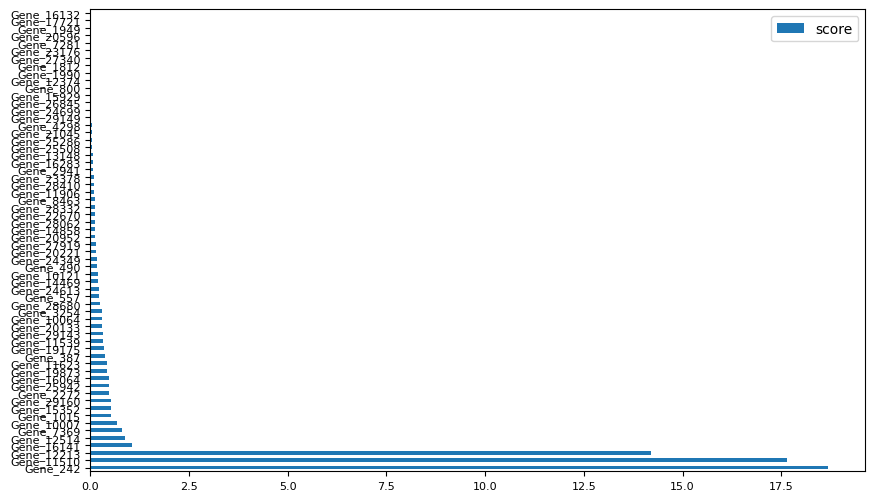

Thresh=0.296, n=1, Accuracy: 79.66%
Thresh=0.279, n=2, Accuracy: 79.66%
Thresh=0.225, n=3, Accuracy: 98.31%
Thresh=0.017, n=4, Accuracy: 96.61%
Thresh=0.014, n=5, Accuracy: 96.61%
Thresh=0.013, n=6, Accuracy: 98.31%
Thresh=0.011, n=7, Accuracy: 98.31%
Thresh=0.008, n=8, Accuracy: 100.00%
Thresh=0.008, n=9, Accuracy: 100.00%
Thresh=0.008, n=10, Accuracy: 100.00%
Thresh=0.008, n=11, Accuracy: 100.00%
Thresh=0.007, n=12, Accuracy: 100.00%
Thresh=0.007, n=13, Accuracy: 100.00%
Thresh=0.007, n=14, Accuracy: 100.00%
Thresh=0.007, n=15, Accuracy: 100.00%
Thresh=0.006, n=16, Accuracy: 100.00%
Thresh=0.005, n=17, Accuracy: 100.00%
Thresh=0.005, n=18, Accuracy: 100.00%
Thresh=0.005, n=19, Accuracy: 100.00%
Thresh=0.005, n=20, Accuracy: 96.61%
Thresh=0.005, n=21, Accuracy: 96.61%
Thresh=0.005, n=22, Accuracy: 96.61%
Thresh=0.004, n=23, Accuracy: 96.61%
Thresh=0.003, n=24, Accuracy: 96.61%
Thresh=0.003, n=25, Accuracy: 96.61%
Thresh=0.003, n=26, Accuracy: 96.61%
Thresh=0.003, n=27, Accuracy: 96.61

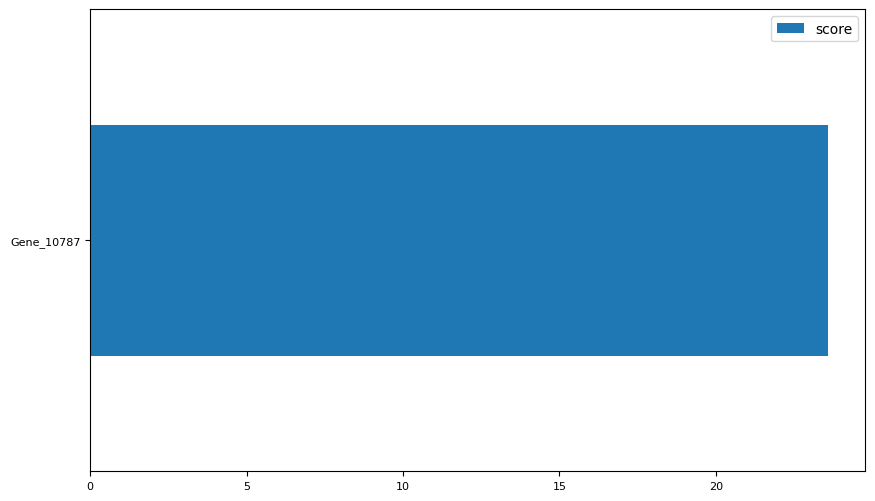

Thresh=1.000, n=1, Accuracy: 100.00%
--------------------REPORT: streptomycin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

---------------teicoplanin-----------------
           Gene       Chi2    P-value  Adjusted P-value  Significant
11    Gene_1...  21.729890  3.1386...  1.7748...              True  
29    Gene_1...  23.104522  1.5342...  8.6764...              True  
33    Gene_1...  22.162227  2.5055...  1.4168...              True  
37    Gene_1...  26.075048  3.2840...  1.8571...              True  
65    Gene_1...  57.121372  4.0972...  2.3170...              True  
...         ...        ...        ...        ...               ...  
5611  Gene_9780  21.729890  3.1386...  1.7748.

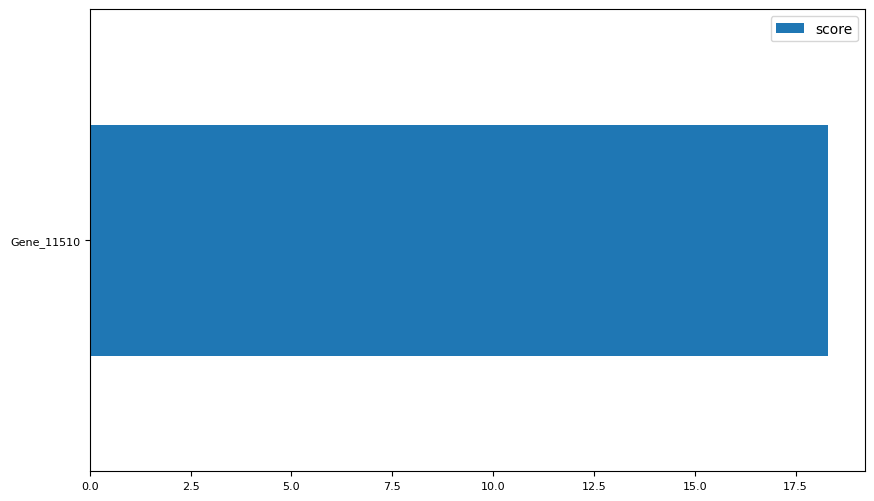

Thresh=1.000, n=1, Accuracy: 100.00%
--------------------REPORT: teicoplanin---------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        28

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

---------------gentamicin-----------------
           Gene       Chi2    P-value  Adjusted P-value  Significant
3     Gene_1...  98.600615  3.0892...  2.0398...              True  
6     Gene_1...  39.148656  3.9273...  2.5932...              True  
7     Gene_1...  98.600615  3.0892...  2.0398...              True  
13    Gene_1...  90.341021  2.0045...  1.3235...              True  
14    Gene_1...  50.939290  9.5267...  6.2905...              True  
...         ...        ...        ...        ...               ...  
6575  Gene_9899  52.665010  3.9557...  2.6119...

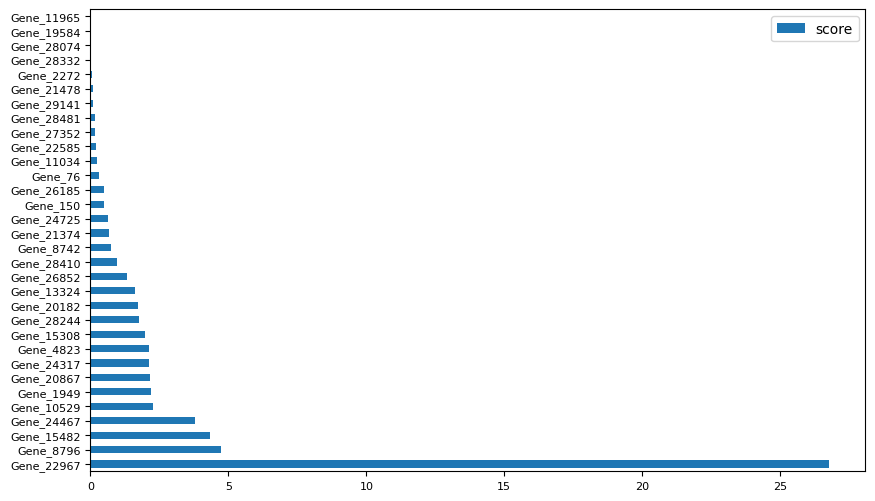

Thresh=0.416, n=1, Accuracy: 97.06%
Thresh=0.074, n=2, Accuracy: 97.06%
Thresh=0.067, n=3, Accuracy: 97.06%
Thresh=0.059, n=4, Accuracy: 97.06%
Thresh=0.035, n=5, Accuracy: 97.06%
Thresh=0.034, n=6, Accuracy: 100.00%
Thresh=0.034, n=7, Accuracy: 100.00%
Thresh=0.033, n=8, Accuracy: 100.00%
Thresh=0.033, n=9, Accuracy: 100.00%
Thresh=0.031, n=10, Accuracy: 100.00%
Thresh=0.027, n=11, Accuracy: 100.00%
Thresh=0.027, n=12, Accuracy: 100.00%
Thresh=0.025, n=13, Accuracy: 100.00%
Thresh=0.021, n=14, Accuracy: 100.00%
Thresh=0.015, n=15, Accuracy: 100.00%
Thresh=0.012, n=16, Accuracy: 100.00%
Thresh=0.010, n=17, Accuracy: 100.00%
Thresh=0.010, n=18, Accuracy: 100.00%
Thresh=0.008, n=19, Accuracy: 97.06%
Thresh=0.008, n=20, Accuracy: 100.00%
Thresh=0.005, n=21, Accuracy: 100.00%
Thresh=0.004, n=22, Accuracy: 97.06%
Thresh=0.003, n=23, Accuracy: 97.06%
Thresh=0.003, n=24, Accuracy: 97.06%
Thresh=0.003, n=25, Accuracy: 97.06%
Thresh=0.001, n=26, Accuracy: 97.06%
Thresh=0.001, n=27, Accuracy: 97

In [ ]:
#discovered: linezolid has 0 resistant to any strains ＃170
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from numpy import sort
from statistics import mean
from scipy.stats import chi2_contingency
np.set_printoptions(threshold = np.inf)

drugs = ['ampicillin','vancomycin','streptomycin','teicoplanin','gentamicin']

for i in drugs:
  drug = i
  if i =='vancomycin':
    header_ = 1
  else:
    header_ = 0
  antibiotics = pd.read_csv('/content/drive/MyDrive/e.faecium/{}1.csv'.format(i),header =header_,index_col =0,encoding = 'utf-8') #header=1讓第二行作為欄位抬頭

  print("---------------{}-----------------".format(i))
  antibiotics.replace('R',1, inplace = True)
  antibiotics.replace('S',0, inplace = True)

  df_data = pd.DataFrame(data= antibiotics)
  header_list = df_data.columns.tolist()

  #check out data info & statistical description
  #df_data.info()
  #df_data.describe()
  #統計分析
  resistance = df_data['Resistant']
  genes = df_data.drop(labels=['Resistant'],axis=1)
  # 結果存放
  results = []

    # 對每個基因進行卡方檢定
  for gene in genes.columns:
      contingency_table = pd.crosstab(resistance, genes[gene])
      chi2, p, _, _ = chi2_contingency(contingency_table)
      results.append((gene, chi2, p))

    # 結果轉為DataFrame
  results_df = pd.DataFrame(results, columns=['Gene', 'Chi2', 'P-value'])
  results_df.to_csv('/content/drive/My Drive/e.faecium/{}_chi-square.csv'.format(i))

    # 多重檢定校正（如Bonferroni）
  results_df['Adjusted P-value'] = results_df['P-value'] * len(genes.columns)
  results_df['Significant'] = results_df['Adjusted P-value'] < 0.05

    # 顯示顯著基因
  significant_genes = results_df[results_df['Significant']]
  print(significant_genes)

  #Define Input/ Output (array type)
  X = df_data.drop(labels=['Resistant'],axis=1).values
  y = df_data['Resistant'].values

  #define train, test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify =y)
  #statsitics count
  train_r = np.count_nonzero(y_train == 1)
  train_s = np.count_nonzero(y_train == 0)
  test_r = np.count_nonzero(y_test == 1)
  test_s = np.count_nonzero(y_test == 0)
  print("train:", train_r)
  stat_train = pd.DataFrame( [[int(train_r),int(train_s)]],columns=['Resistant', 'Susceptible'])
  stat_test = pd.DataFrame( [[int(test_r), int(test_s)]],columns=['Resistant', 'Susceptible'])
  print(stat_train)
  print(stat_test)

  #Fit Model
  xgboostModel = XGBClassifier(n_estimators=300, learning_rate= 0.3)
  xgboostModel.fit(X_train, y_train)

  #Print feature
  orig_feature_names = df_data.drop(labels=['Resistant'],axis=1).columns
  feature_important = xgboostModel.get_booster().get_score(importance_type='gain')
  keys = list(feature_important.keys())
  keys = keytrans(keys, orig_feature_names)
  values = list(feature_important.values())
  keys_df_data = pd.DataFrame({'Gene': keys,'Score': values}).sort_values(by = "Score", ascending=False)
  keys_df_data.to_csv('/content/drive/My Drive/e.faecium/{}_keys.csv'.format(i))
  data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
  data.nlargest(100, columns="score").plot(kind='barh', figsize = (10,6), fontsize=8) ## plot top 40 features
  plt.show()

  #prediction
  y_pred = xgboostModel.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)


  # Fit model using each importance as a threshold
  thresholds = sort(xgboostModel.feature_importances_ )[::-1]

  fs = []
  for thresh in thresholds:
    if thresh <=0:
      break
    # select features using threshold
    selection = SelectFromModel(xgboostModel, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    fs.append((thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

  # 結果轉為DataFrame

  fs_df = pd.DataFrame(fs, columns=['Thresh', 'Feature Counts', 'Accuracy'])
  fs_df.to_csv('/content/drive/My Drive/e.faecium/{}_fs.csv'.format(i))


  #評估報表
  print('--------------------REPORT: {}---------------------\n'.format(i))
  print(classification_report(y_test, predictions))

# **Statistics**